## Stochastic volatility model for option pricing using the Log Ornstein-Uhlenbeck model


Consider a special case of the Log Ornstein-Uhlenbeck model, where the underlying asset $S_t$ satisfies the stochastic differential equation

$$dS_t=rS_tdt+e^{Y_t}S_tdW_t,$$ $$dY_t=(-\alpha(2+Y_t)+0.4\sqrt{\alpha}\sqrt{1-\rho^2})dt+0.4\sqrt{\alpha}dZ_t,$$ $$dZ_t=\rho dW_t+\sqrt{1-\rho^2}dB_t.$$
Here, $W_t$ and $B_t$ are two independent Brownian motions and $e^{Y_t}$ is the stochastic volatility.

We want to estimate the European call option price  

$$e^{-rT}\mathbb{E}[\text{max}(S_T-K,0)]$$

where $e^{-rT}$ is the discount factor, $K$ is the strike price, and $T$ is the time at maturity of the option. In order to obtain $S_T$, we will perform a forward Euler discretization of the SDE system and simulate $S_t$ to maturity of the option.

Using the time discretization $t_n=n\Delta t,\hspace{1mm} n=1,2..N$ where $\Delta t=\frac{T}{N}$, the problem discretizes to

$$S_{n+1}-S_n=rS_n\Delta t+e^{Y_n}S_n(W_{n+1}-W_n),$$
$$Y_{n+1}-Y_n=(-\alpha(2+Y_n)+0.4\sqrt{\alpha}\sqrt{1-\rho^2})\Delta t+0.4\sqrt{\alpha}(Z_{n+1}-Z_n),$$ $$Z_{n+1}-Z_n=\rho (W_{n+1}-W_n)+\sqrt{1-\rho^2}(B_{n+1}-B_n),$$

where $W_{n+1}-W_n,$ and $B_{n+1}-B_n$ are $N(0,\Delta t)$ distributed. We will consider an at the money call option with parameters $\alpha=100, \rho=-0.3, r=0.04, T=0.75, Y_0=-1$ and $S_0=K=100$.

In [207]:
"""Libraries we will use."""

import numpy as np
import matplotlib.pyplot as plt

In [253]:
"""Some global variables."""

T=0.75
alpha=100
rho=-0.3
r=0.04
Y_0=-1
S_0=100
K=100

In [298]:
"""This function discretizes the system of SDE's and solves for S_t on the given time interval using forward Euler."""

def LogOU_forward_euler(N,M):      # N is the number of timesteps, hence it determines the timestep dt=T/N.
                                   # M is the number of simulations.
    
    """Creating matrices for the stochastic processes,
    and initializing Y_0 and S_0."""
    
    dt=T/N
    W=np.zeros((M,N))
    B=np.zeros((M,N))
    Z=np.zeros((M,N))
    Y=np.zeros((M,N))
    S=np.zeros((M,N))
    Y[:,0]=Y_0*np.ones(M)
    S[:,0]=S_0*np.ones(M)
    
    """Forward Euler steps."""
    
    for i in range(N-1):
        dW=np.random.normal(0, np.sqrt(dt), size=(M))   # Drawing M values from a N(0,dt) distribution.
        dB=np.random.normal(0, np.sqrt(dt), size=(M))
        dZ=rho*dW+np.sqrt(1-rho**2)*dB
        W[:,i+1]=W[:,i]+dW
        B[:,i+1]=B[:,i]+dB
        Z[:,i+1]=Z[:,i]+rho*dW+np.sqrt(1-rho**2)*dB
        Y[:,i+1]=Y[:,i]+(-alpha*(2*np.ones(M)+Y[:,i])+0.4*np.ones(M)*np.sqrt(alpha)*np.sqrt(1-rho**2))*dt+0.4*np.sqrt(alpha)*dZ
        S[:,i+1]=S[:,i]+r*S[:,i]*dt+np.exp(Y[:,i])*S[:,i]*dW
    
    return S

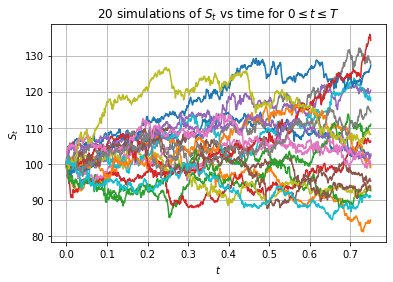

In [314]:
"""Some plotting of S_t."""

N=1000
M=20
t=np.linspace(0,T,N)
S=LogOU_forward_euler(N,M)
plt.plot(t,S.T)
plt.title(str(M)+" simulations of $S_t$ vs time for $0\leq t\leq T$")
plt.ylabel("$S_t$")
plt.xlabel("$t$")
plt.grid(True)


Now, we use the Monte Carlo estimate of the expectation. This estimate approaches the true expectation as we increase the number of simulations $M$ in accordance with the law of large numbers. We have
$$e^{-rT}\mathbb{E}[\text{max}(S_T-K,0)\approx \frac{1}{M}\sum_{j=1}^Me^{-rT}\text{max}(S^k_T-K,0)$$ 
where $S^k_T, k=1,2..M$ are samples of $S_T$ using the forward Euler discretization.

In [ ]:
"""The expression for C below is a vector containing M samples of exp(-rT)max(S^k_T-K,0). 
We calculate the mean of C to obtain an estimate of the true option price. 
It is important to let M be large in order to ensure convergence."""

N=1000
M=5*10**5
S=LogOU_forward_euler(N,M)
C=np.exp(-r*T)*np.maximum(S[:,-1]-K*np.ones(M),np.zeros(M)) 
C_mean=np.mean(C)
print(C_mean)